# Analiza danych w czasie rzeczywistym
Laboratorium 1, 27.03.2021  
Studia sobotnio-niedzielne, semestr letni 2020/2021

## Agenda
1. Uruchomienie Dockera i przedstawienie Jupyter Notebook
1. Git i GitHub
1. Pakiety numpy i pandas
1. Programowanie obiektowe
1. Proste modele sieci neuronowych
1. Flask

### Uruchomienie Dockera i przedstawienie Jupyter Notebook
1. Użytkownicy MAC OS mają już wbudowany Terminal, z którego mogą korzystać, poniższe kroki konfiguracji (2 - 7) nie są dla nich, a dla użytkowników Windows.
2. Najwygodniej korzystać z Dockera korzystająć z maszyny wirtualnej.
3. W tym celu możecie pobrać VirtualBox. (https://www.virtualbox.org/).
4. Potrzebny jest również obraz maszyny wirtualnej, polecam Ubuntu (https://www.linuxvmimages.com/images/ubuntu-2004/#ubuntu-2004-lts).
5. Pobraliśmy plik w formacie .ova możemy skorzystać z funkcji Plik -> Importuj urządzenie wirtualne, żeby móc rozpocząć działanie na Ubuntu. Możemy zostawić domyślne ustawienia.
6. W ustawieniach maszyny wirtualnej, polecam wybrać Ogólne -> Zaawansowane i wybrać Bidirectional dla opcji Współdzielony schowek oraz Przeciąganie i upuszczanie. W ten sposób za pomocą ctrl+c, ctrl+v lub drag & drop możemy przenosić pliki między naszym systemem a maszyną wirtualną. Bardzo to ułatwia życie.
7. Włączamy naszą maszynę wirtualną. Użytkownik: ubuntu hasło: ubuntu.
8. Tworzymy gdzieś folder, w którym chcemy odkładały się nasze notebooki.
9. Otwieramy Terminal wpisujemy docker. Prawdopodobnie nie jest zainstalowany. Dostajemy podpowiedź jaką komendę wpisać, aby móc zainstalować docker. 
10. Jeżeli zwraca nam się błąd to powtarzamy komendę dodając sudo przed nią. sudo to komenda czasami tłumaczona jako "super user" dzięki temu logujemy się jako użytkownik root i mamy do wsyztskiego dostęp.
11. U siebie, lokalnie, na cele uczenia, na maszynie, którą możemy utracić i nie będzie nam żal - świetna sprawa. W środowisku produkcyjnym niedoświadczony użytkownik z dostępem do sudo może narobić dużo szkód - USE WISELY :).
12. Gdzie jest obraz dockera?  
Obraz umieszczony na potrzeby dzisiejszych ćwiczeń został umieszony na GitHub p. dr Sebastiana Zająca.  
https://github.com/sebkaz/docker-data-science
13. Korzystamy z instrukcji pokazanych na stronie. I znów, gdyby jakaś komenda nie działała wpisujemy przed nią sudo.
14. Otwieramy dowolną przeglądarkę i wpisujemy https://localhost:8888, hasło do Jupytera: root.

### Git i Gihub
1. Wejdź do wybranej przez siebie lokalizacji.  
2. Uruchom komendę `git clone https://github.com/mwojte/rta-lato-21.git`.  
3. Powstał folder rta-lato-21, w którym będą kody wrzucane na mojego githuba  
4. W celu odświeżenia repozytorium użyj komendy `git pull`  
5. Na stronie https://github.com/mwojte/rta-lato-21 możesz obejrzeć i pobrać kody bez używania git, ale polecam się z tym narzędziem zaznajomić.

### Pakiety numpy i pandas

In [51]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


> Zadanie domowe - Sprawdź co możesz zrobić 
wykorzystując podstawowe biblioteki: `collections`,
`decimal`, `json`,`math`,`os`,`random`,`re`,`sqlite3`,`sys`.

In [34]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from IPython.display import HTML
from IPython.display import Image

Z pakietu sklaern pbieramy zbiór danych iris.
Taki sam zbiór danych widoczny jest w R.

In [ ]:
iris = load_iris()
type(iris)

Zbiór iris jest typem Bunch z pakietu sklaern, który działa podobnie do zwykłego słownika Pythonowego.

In [11]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
type(iris['data'])

numpy.ndarray

Stworzymy z elementów, które mamy dataframe, który posłuży nam do dalszej analizy.  
'data' - numpy array z danymi  
'target' - jaki rodzaj kwiatka jest opisany  
'feature_names' - nazwy kolumn dla 'data'

In [20]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [21]:
df['target']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [22]:
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df = df.drop(columns=['target'])

In [23]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


Powyżej przedstawiona została ramka danych stanowiąca fragment danych Iris. Zbiór ten składa się z wyników pomiarów czterech cech trzech gatunków kwiatów Irysa.  
Przez macierz X będziemy oznaczali zbiór wszystkich przypadków i cech. Co w naszym przypdaku generuje macierz 150 wierszy oraz 4 kolumn.  
Przez wektor y oznaczać będziemy etykiety.


Zredukujmy nasze dane do dwóch gatunków i dwóch cech

In [30]:
y = df.iloc[0:100,4]
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
95    versicolor
96    versicolor
97    versicolor
98    versicolor
99    versicolor
Name: species, Length: 100, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [31]:
y.unique()

['setosa', 'versicolor']
Categories (2, object): ['setosa', 'versicolor']

In [36]:
#Iris Setosa
Image(url="https://www.cowellsgc.co.uk/files/images/webshop/iris-setosa-baby-blue-1587831588_l.jpg")

In [38]:
#Iris Versicolor
Image(url="http://latour-marliac.com/323-large_default/iris-versicolor-iris-versicolore.jpg")

Zakodujmy na liczby, dla setosa dajmy -1, a dla versicolor dajmy 1

In [39]:
y = np.where(y == 'setosa',-1,1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

Z macierzy X bierzemy pierwszych 100 wierszy oraz kolumny o indeksach 0 i 2.

In [42]:
print(iris['feature_names'][0])
print(iris['feature_names'][2])

sepal length (cm)
petal length (cm)


In [44]:
#Budowa kwiatu
Image(url="https://upload.wikimedia.org/wikipedia/commons/7/7f/Mature_flower_diagram.svg")

Będziemy opierać nasze predykcje na dwóch cechac sepal length(cm), czyli długość działki w cm oraz petal length (cm) czyli długość płatka w cm.

In [45]:
X = df.iloc[:100,[0,2]].values #values- zamienia na np array

Wizualizacja graficzna

In [47]:
import matplotlib.pyplot as plt

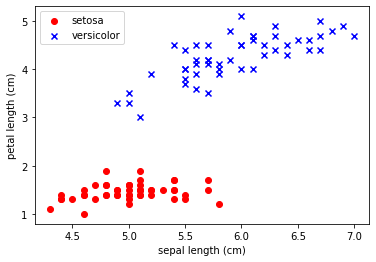

In [48]:
plt.scatter(X[:50,0],X[:50,1],color='red', marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue', marker='x',label='versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()

Na wykresie rozproszenie widzimy, że obie cechy idealnie będą nadawału się do rozróżniania między gatunkiem setosa a versicolor.  
Będziemy chcieli stworzyć model Liniowego Perceptronu, żeby klasyfikować nasze kwiaty, ale do tego przyda nam się programowanie obiektowe

### Programowanie obiektowe

#### Podstawy obiektowości

Aplikacje powinny być wytwarzane w sposób niezawodny, szybki oraz ekonomiczny.
`Obiekty` (a dokładniej `Klasy`) to jeden ze środków dzięki któremy można uzyskać ten cel. 
Obiekty można rozumieć jako _wieloużywalne_ komponenty oprogramowania (_ang. reusable_).
Potrafią realizować one rozmaite koncepcje i byty np. datę, czas, obrazy, samochody, dźwięk, ludzi etc. 
Praktycznie wszystko co określane jest jako rzeczownik, może być realizowane w kategoriach **atrybutów** obiektów. 
Natomiast zachowania obiektów, wyrażane czasownikami, można określić jako **metody** klas.
Programy oparte o obiekty są dużo łatwiejsze do zrozumienia i weryfikacji niż kody pisane w konwencji tzw. programowania strukturalnego.

> Zadanie domowe - Jakie inne koncepcje programowania używane są współczenie ? (zobacz np. język Scala)


Obiekt realizujący konto bankowe można wygenerować z klasy, która zapewne posiada metody reprezentujące wpłaty środków (ang. _deposit_), ich wypłatę (ang. _withdraw_) czy udostępnianie bieżącego salda (ang. _inquire_).

Tak jak wspomniano wcześniej wieloużywalne klasy to takie na podstawie których możemy zrealizować wiele obiektów (egzlemplarzy czy **instancji**). 
Drugą ciekawą własnością obiektowości jest możliwosć tworzenia nowych klas na bazie już istniejących poprzez tzw. mechanizm dziedziczenia (ang. _inheritance_) - Nie odkrywaj Ameryki na nowo.

> Zadanie domowe - Usiądź do komputera, wyłącz fb i inne rozpraszacze ! Zacznij myśleć i pisz kod zorientowany obiektowo (ang. _Object Oriented Analysis and Design_). Ale wpierw sprawdź kiedy i gdzie powstał język Python. Znajdź inne języki zorientowane obiektowo. Gdzie w analizach danych słyszałeś o takich językach ? 

> Zadanie domowe bis - Przestań zastanawiać się nad życiowym pytaniem "Python czy R"

In [54]:
###Prosty przykład z pracownikiem

In [53]:
from random import randint

class Die():
    """Pojedynczy rzut kością"""
    def __init__(self, num_sides=6):
        """Kość to zazwyczaj sześcian"""
        self.num_sides = num_sides

    def roll(self):
        """Zwraca losową wartość od 1 do liczby ścian"""
        return randint(1,self.num_sides)

# program 

die = Die() # stwórz kość

results = []
for roll_num in range(10): # powtórz 10 razy
    result = die.roll() # rzuć kością raz
    results.append(result) # zapisz do listy

print(results)

[4, 2, 6, 4, 6, 1, 2, 5, 1, 3]


>Zadanie domowe - Zmień kod klasy dieN w taki sposób aby bez użycia pętli można było rzucić kością $n$ razy, metodę tej klasy nazwij n_roll. Spróbuj napisać kod w taki sposób, aby nie musieć przepisywać kodu klasy Die (wykorzystaj tzw. "dziedziczenie klas"). Obiekt nazwij wielorzut.  
Przeprowadź eksperyment rzuć 10, 100, 1000, 10000 i 100000 razy. Za każdym razem przygotuj histogram.  
Dodatkowo - spróbuj umieścić histogram jako metodę klasy dieN.

> Zadanie domowe - przeanalizuj kod klasy RandomWalk

```{python}
from random import choice

class RandomWalk(object):
    """generowanie błądzenia losowego"""
    def __init__(self, num_points=5000):
        self.num_points = num_points
        self.x_values = [0]
        self.y_values = [0]

    def fill_walk(self):
        while len(self.x_values) < self.num_points:
            x_direction = choice([-1,1])
            x_distance = choice([0,1,2,3,4])
            x_step = x_direction*x_distance

            y_direction = choice([-1,1])
            y_distance = choice([0,1,2,3,4])
            y_step = y_direction*y_distance

            if x_step == 0 and y_step == 0:
                continue

            next_x = self.x_values[-1] + x_step
            next_y = self.y_values[-1] + y_step

            self.x_values.append(next_x)
            self.y_values.append(next_y)

rw = RandomWalk(50000)
rw.fill_walk()

point_number = list(range(rw.num_points))
plt.scatter(rw.x_values,rw.y_values, c=point_number, cmap=plt.cm.Blues, edgecolor='none', s=15)
plt.scatter(0,0,c='green', edgecolor='none',s=100)
plt.scatter(rw.x_values[-1],rw.y_values[-1], c='red',edgecolor='none', s=100)
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
plt.show()

```

### Proste modele sieci neuronowych

#### Sztuczne neurony - rys historyczny

W 1943 roku W. McCulloch i W. Pitts zaprezentowali pierwszą koncepcję uproszczonego modelu komórki nerwowej tzw. **Nuronu McCulloch-Pittsa** (MCP). [W.S. McCulloch, W. Pitts, A logical Calculus of the Ideas Immanent in Nervous Activity. "The Bulletin of Mathematical Biophysics" 1943 nr 5(4)](https://www.cs.cmu.edu/~./epxing/Class/10715/reading/McCulloch.and.Pitts.pdf)

Neuronami nazywamy wzajemnie połączone komórki nerwowe w mózgu, które są odpowiedzialne za przetwarzanie i przesyłanie sygnałów chemicznych i elektrycznych. Komórka taka opisana jest jako bramka logiczna zawierająca binarne wyjścia. Do dendrytów dociera duża liczba sygnałów, które są integrowane w ciele komórki i (jeżeli energia przekracza określoną wartość progową) zostaje wygenerowany sygnał wyjściowy przepuszczany przez akson.

Po kilku latach Frank Rosenblatt (na podstawie MCP) zaproponował pierwszą koncepcję reguły uczenia perceprtonu. [F. Rosenblatt, The Perceptron, a Perceiving and Recognizing Automaton, Cornell Aeronautical Laboratory, 1957](https://blogs.umass.edu/brain-wars/files/2016/03/rosenblatt-1957.pdf)


#### Niech się uczy !!!

```{python}
dziecko = Perceptron()
dziecko.fit()

# dziecko musi mieć parametr uczenia
dziecko.eta

# możemy sprawdzić jak szybko się uczy == ile błędów robi

dziecko.errors_ 

# rozwiązania znajdą się w wagach
dziecko.w_
# w naszym przypadku dziecko uczy się dwóch wag !

```

In [76]:
# implementacja 
class Perceptron():
    
    def __init__(self,eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            i = 0
            for xi, target in zip(X,y):
                i += 1
                #print(xi, target)
                update = self.eta*(target-self.predict(xi))
                #print(update)
                self.w_[1:] += update*xi
                self.w_[0] += update
                #print([i,update ,xi,self.w_])
                errors += int(update != 0.0)
            self.errors_.append(errors)
            #print(self.w_)
            #print("Błąd w iteracji "+str(_)+":")
            #print(self.errors_[_])
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X)>=0.0,1,-1)

#### Co tutaj się wydarzyło?
Stworzyliśmy klasę, dzięki, której możemy stworzyć prosty model perceptronu liniowego.  
Funkcja aktywacji w perceptronie liniowym jest bardzo prosta.  
Przypomina nam najprostszy model KMNK (Klasycznej Metody Najmniejszych Kwadratów).  
$y_i = w_0 + w_1x_{1i}+w_2x_{2i}$

1. Zainicjowaliśmy wagi równe 0 dla każdego parametru.  
```self.w_ = np.zeros(1+X.shape[1])```  
Początkowo nasz model wygląda tak:  
$y_i = 0 + 0\times x_{1i} + 0\times x_{2i} $
2. Liczymy wartości z powyższego wzoru, czyli dla każdego elementu w dataframe X liczymy wartość y.  
```def net_input(self, X):```  
Korzystając z funkcji ```np.dot``` wymnażamy elementy z macierzy X przez odpowiadające im wagi i dodajemy wyraz wolny.  
Ponieważ mnożymy wszytsko przez 0 i dodajemy zero to wynikiem jest 0.
3. Przewidujemy, ustalamy punkt odcięcia na poziomie 0 i wyznaczamy, że dla wartości $y_i>=0$, wartością przewidywaną jest 1 (versicolor), a dla wartości $y_i<0$ wartością przewidywaną jest -1 (setosa). Dla każdej obserwacji otrzymujemy 0, czyli przewidujemy 1 (versicolor).
4. Liczymy kolejne wagi.  
```update = self.eta*(target-self.predict(xi))```  
```self.w_[1:] += update*xi```  
```self.w_[0] += update```  
Dla każdej obserwacji obliczamy wartość update, czyli różnicę między wartością obserwowaną a przewidywaną.  
Na przykładzie dla pierwszej obserwacji:  
$x_{11}=5.1$  
$x_{21}=1.4$  
$y_1 = -1$  
$\hat{y_1} = 1$  
$update = 0.01*(-1 - 1) = 0.01*(-2) = - 0.02$  
Tutaj kluczowa jest ustalana przez nas wartość ```eta```, która mówi jak bardzo pomyłka na predykcji ma się przełożyć na uaktualnienie wartości wag. W naszym przykładzie wybrano 0.01.
Teraz wyraz wolny uaktualniamy (funkcja liniowa zatem po prostu dodajemy) o wartość update, a wagi dla $w_{1}$ oraz $w_{2}$ o wartość $update$ przemnożoną przez odpowiednio przez $x_{11}$ oraz $x_{22}$.  
$w_0 = 0 + (-0.02) = -0.02$  
$w_1 = 0 + (-0.02)\times 5.1 = -0.102$  
$w_2 = 0 + (-0.02)\times 1.4 = -0.028$  
5. Dla obserwacji $x_{12},\;x_{22}$ nowy zestaw wag początkowych to:  
$w_0 = -0.02;\;\;w_1 = -0.102;\;\;w_2 = -0.028$  
6. Tak jak to zrobiliśmy powyżej powtarzamy dla każdej obserwacji. Za każdym razem sumujemy wartość $update$ do zmiennej $error$ po wszytskich obserwacjach dodajemy ją do listy wartości błedów, to pozwoli nam określić jak duży błąd model popełnia przy każdej iteracji. Jedna iteracja to przebięgniecie algorytmu po wszystkich obserwacjach. Parametrem ```n_iter``` możemy sterować ile tych iteracji wykonamy.  
W rzeczywistości przy uczeniu sieci neuronowej najczęściej używa się dwóch kryteriów STOP (czyli kiedy przestać uczyć sieć) albo jest to właśnie ilość iteracji. Albo kryterium poprawności predykcji, gdy osiągniemy oczekiwany rezultat kończymy uczyć sieć.

> Zadanie - zmień wagi tak by zamiast od zera uzyskiwały małą wartość losową.

In [81]:
ppn = Perceptron()
ppn.fit(X,y)
print(ppn.errors_)
print(ppn.w_)

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]
[-0.04  -0.068  0.182]


In [82]:
sum(d.predict(X)-y)

0

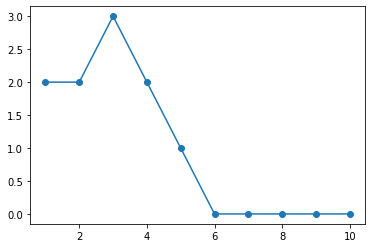

In [83]:
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_, marker='o')

#### Rysowanie obszaru decyzyjnego

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


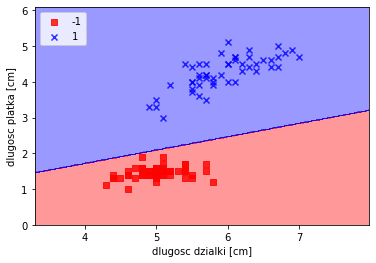

In [86]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier, resolution=0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0], y=X[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

# dla kwiatków

plot_decision_regions(X,y,classifier=ppn)
plt.xlabel("dlugosc dzialki [cm]")
plt.ylabel("dlugosc platka [cm]")
plt.legend(loc='upper left')
plt.show()

Czy to dobrze mieć tak wytrenowany model?  
Jakie mogą być skutki w 100% poprawnie przewidującego modelu?  
Czy nadaje się do ponownego użytku? Czy typ danych jest istotny?

In [79]:
#Przeuczenie
Image(url="https://miro.medium.com/max/771/1*cdvfzvpkJkUudDEryFtCnA.png")

#### Adaptacyjny Neuron Liniowy

>Zadanie - Opisz czym się różni poniższy algorytm od Percpetrona Liniowego?

In [87]:
class Adaline():
    '''Klasyfikator  - ADAptacyjny LIniowy NEuron'''
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X,y):
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(X)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1) 

Lista różnic:
1. ...

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[-3.49781966e+29 -1.95351607e+30 -1.09296264e+30]
[50.0, 2232.170600100001, 3477149.580688752, 5423856121.834538, 8460446119570.33, 1.3197095750266606e+16, 2.0585597234511077e+19, 3.2110611419406375e+22, 5.0087998612909835e+25, 7.813017236821083e+28, 1.2187198537241974e+32, 1.9010300845897673e+35, 2.9653372524225975e+38, 4.625505451957496e+41, 7.215132332286716e+44, 1.1254582901935258e+48, 1.7555552755383604e+51, 2.7384171873136355e+54, 4.2715423411974844e+57, 6.663000092598068e+60]


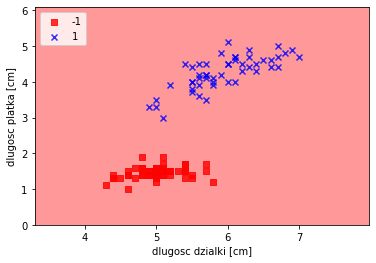

In [91]:
ad = Adaline(n_iter=20, eta=0.01)
ad.fit(X,y)

print(ad.w_)
print(ad.cost_)

plot_decision_regions(X,y,classifier=ad)
plt.xlabel("dlugosc dzialki [cm]")
plt.ylabel("dlugosc platka [cm]")
plt.legend(loc='upper left')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[-0.02592486 -0.06051515  0.1715288 ]
[50.0, 48.06652532001, 46.75144514288093, 45.669166169041226, 44.68285225462052, 43.74375485873791, 42.83432237396728, 41.94805590552315, 41.0823763843537, 40.23609878889177, 39.40853767342516, 38.59919031903236, 37.80762441431973, 37.033438159706726, 36.276246018482304, 35.535673551662214, 34.81135547190516, 34.102934839818374, 33.41006266728063, 32.73239766734416]


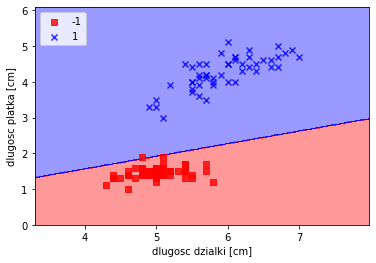

In [92]:
ad2 = Adaline(n_iter=20, eta=0.0001)

ad2.fit(X,y)

print(ad2.w_)
print(ad2.cost_)

plot_decision_regions(X,y,classifier=ad2)
plt.xlabel("dlugosc dzialki [cm]")
plt.ylabel("dlugosc platka [cm]")
plt.legend(loc='upper left')
plt.show()

### Flask

#### Czym jest API - krótki filmik tłumaczący zagadnienie

In [18]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Yzx7ihtCGBs;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

Zapisanie modelu z wykorzystaniem pickle

In [93]:
import pickle
with open('model.pkl', "wb") as picklefile:
    pickle.dump(ppn, picklefile)

Otworzenie pliku i zapisanie modelu jako obiekt w sesji Python

In [94]:
with open('model.pkl',"rb") as picklefile:
    model = pickle.load(picklefile)

In [95]:
model

In [96]:
model.predict([1,0.2])

array(-1)

Stwórzmy plik ze skryptem naszej aplikacji.  
Nazwiemy go app.py.

In [97]:
%%file app.py

import pickle
from math import log10

from flask import Flask
from flask import request
from flask import jsonify
import numpy as np

class Perceptron():
    
    def __init__(self,eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                #print(xi, target)
                update = self.eta*(target-self.predict(xi))
                #print(update)
                self.w_[1:] += update*xi
                self.w_[0] += update
                #print(self.w_)
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X)>=0.0,1,-1)

# Create a flask
app = Flask(__name__)

# Create an API end point
@app.route('/api/v1.0/predict', methods=['GET'])
def get_prediction():

    # sepal length
    sepal_length = float(request.args.get('sl'))
    # sepal width
    #sepal_width = float(request.args.get('sw'))
    # petal length
    petal_length = float(request.args.get('pl'))
    # petal width
    #petal_width = float(request.args.get('pw'))

    # The features of the observation used to predict
    #features = [sepal_length,
    #            sepal_width,
    #            petal_length,
    #           petal_width]
    
    features = [sepal_length,
                petal_length]
    
    print(features)
    # Load pickled model file
    with open('model.pkl',"rb") as picklefile:
        model = pickle.load(picklefile)
    print(model)
    # Predict the class using the model
    predicted_class = int(model.predict(features))

    # Return a json object containing the features and prediction
    return jsonify(features=features, predicted_class=predicted_class)

if __name__ == '__main__':
    app.run()

Writing app.py


Sprawdźmy czy nasz plik się zapisał

In [98]:
!head app.py


import pickle
from math import log10

from flask import Flask
from flask import request
from flask import jsonify
import numpy as np

class Perceptron():


In [102]:
#! pip install Flask

Uruchamiamy naszą aplikację

In [101]:
!python app.py

 * Serving Flask app "app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
[4.5, 1.3]
127.0.0.1 - - [25/Mar/2021 22:29:13] "GET /api/v1.0/predict?&sl=4.5&pl=1.3 HTTP/1.1" 200 -
[4.5, 1.3]
127.0.0.1 - - [25/Mar/2021 22:29:17] "GET /api/v1.0/predict?&sl=4.5&pl=1.3 HTTP/1.1" 200 -
[4.5, 1.3]
127.0.0.1 - - [25/Mar/2021 22:29:17] "GET /api/v1.0/predict?&sl=4.5&pl=1.3 HTTP/1.1" 200 -
[4.5, 1.3]
127.0.0.1 - - [25/Mar/2021 22:29:18] "GET /api/v1.0/predict?&sl=4.5&pl=1.3 HTTP/1.1" 200 -
[4.5, 1.3]
127.0.0.1 - - [25/Mar/2021 22:29:19] "GET /api/v1.0/predict?&sl=4.5&pl=1.3 HTTP/1.1" 200 -
[85.0, 154.0]
127.0.0.1 - - [25/Mar/2021 22:29:27] "GET /api/v1.0/predict?&sl=85&pl=154 HTTP/1.1" 200 -
^C


### Przejdźmy do notatnika LAB1_flask_get